In [1]:
import numpy as np
import skimage.io as io
from skimage.feature import corner_harris, corner_peaks, peak_local_max
from skimage.filters import sobel, sobel_h, sobel_v, gaussian
import matplotlib.pyplot as plt
import cv2


In [229]:
def get_face(img):
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  haar_cascade = cv2.CascadeClassifier('Haarcascade_frontalface_default.xml')

  faces_rect = haar_cascade.detectMultiScale(gray_img)

  x, y, w, h = faces_rect[0]
  face = gray_img[y:y+h, x:x+w]
  return face

In [230]:
def kiro_corner(image):
  image = gaussian(image)

  Ix = abs(sobel_v(image))
  Iy = abs(sobel_h(image))

  Ix2 = Ix*Ix
  Iy2 = Iy*Iy
  Ixy = Ix*Iy

  Ix2 = gaussian(Ix2)
  Iy2 = gaussian(Iy2)
  Ixy = gaussian(Ixy)

  k = 0.05

  # determinant
  detA = Ix2 * Iy2 - Ixy ** 2
  # trace
  traceA = Ix2 + Iy2
      
  harris_response = detA - k * traceA ** 2
  
  return harris_response

In [231]:
def draw_corners(image, coords):
  fig, ax = plt.subplots()
  ax.imshow(image, cmap=plt.cm.gray)
  ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',linestyle='None', markersize=3)
  plt.show()

In [232]:
def get_landmarks(img):
  h, w = img.shape
  left_eye = (w//6, 3*h//9, 2*w//5, h//2)
  right_eye = (4*w//7, 3*h//9, 5*w//6, h//2)
  mouth = (w//3, 3*h//4-10, 2*w//3, 7*h//8)
  
  return left_eye, right_eye, mouth

In [233]:
def you_can_do_it(landmark, face, coords):
  x1, y1, x2, y2 = landmark
  mid = (x1+x2)//2
  
  candidates = []
  for coord in coords:
    y, x = coord
    if(x >= x1 and x <= x2 and y >= y1 and y <= y2): 
      candidates.append(coord)
      
  left = min(candidates, key=lambda coord: abs(coord[1]-x1))
  right = min(candidates, key=lambda coord: abs(coord[1]-x2))
  up = min(candidates, key=lambda coord: np.sqrt((coord[1]-mid)**2 + (coord[0]-y1)**2))
  down = min(candidates, key=lambda coord: np.sqrt((coord[1]-mid)**2 + (coord[0]-y2)**2))

  return [left, right, up, down]

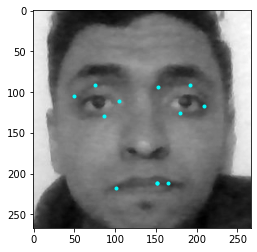

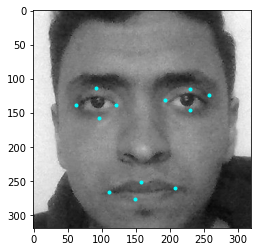

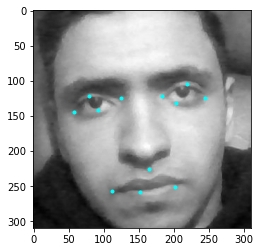

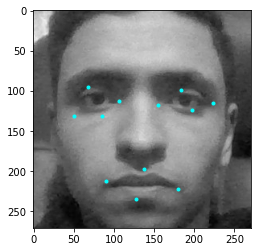

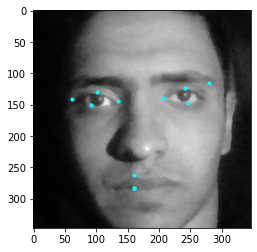

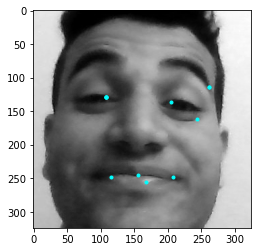

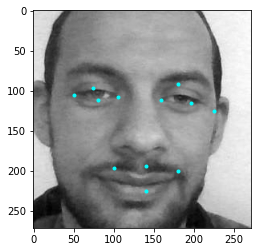

In [234]:
img_paths = ["nu1.jpg", "nu2.jpg", "nu3.jpg", "nu4.jpg", "nu5.jpg", "kh1.jpg", "zuz1.jpg"]
for imgPath in img_paths:
  img = io.imread(imgPath)
  face = get_face(img)
  landmarks = get_landmarks(face)
  R = kiro_corner(face)
  coords = corner_peaks(R, min_distance=1, threshold_rel=0.001)

  critical_landmarks = []
  for landmark in landmarks:
    features = you_can_do_it(landmark, face, coords)
    critical_landmarks += features
    
  critical_landmarks = np.array(critical_landmarks)
  draw_corners(face, critical_landmarks)

